# Red Wine Quality Prediction Project

In [12]:
import warnings
warnings.simplefilter("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from scipy.stats import zscore

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 

In [13]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv")

In [14]:
df 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [15]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

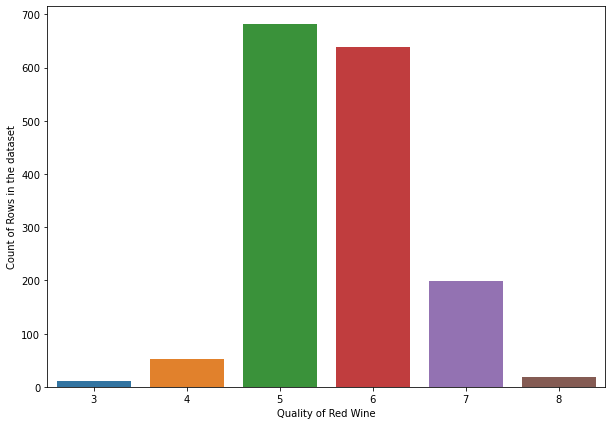

In [16]:
plt.figure(figsize=(10,7))
sns.countplot(x ='quality', data = df)
plt.xlabel('Quality of Red Wine')
plt.ylabel('Count of Rows in the dataset')
plt.show()

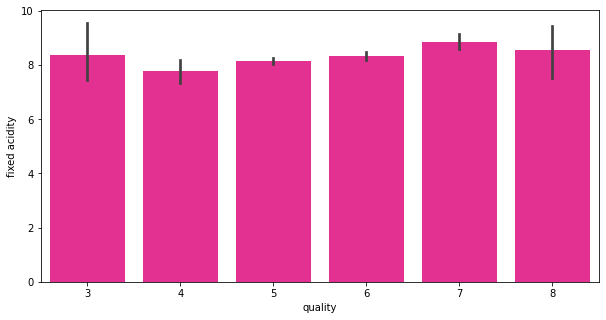

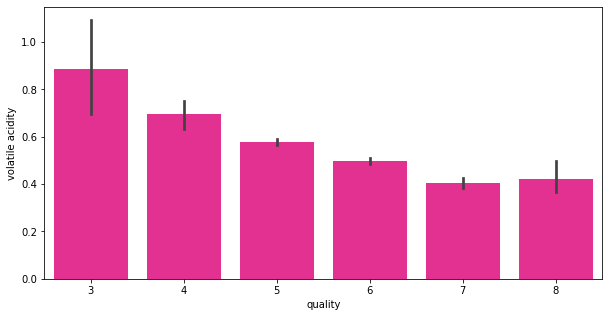

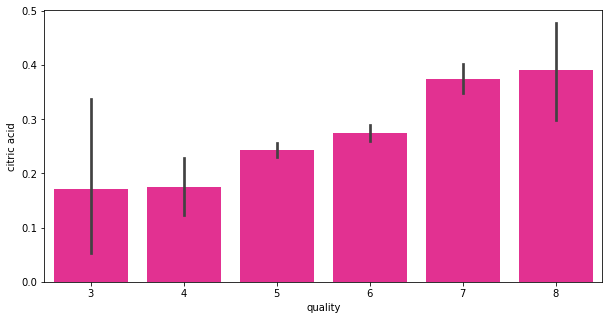

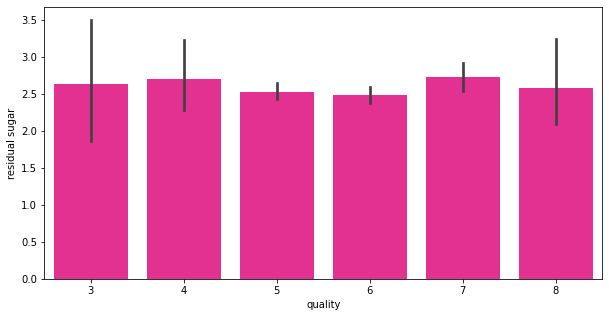

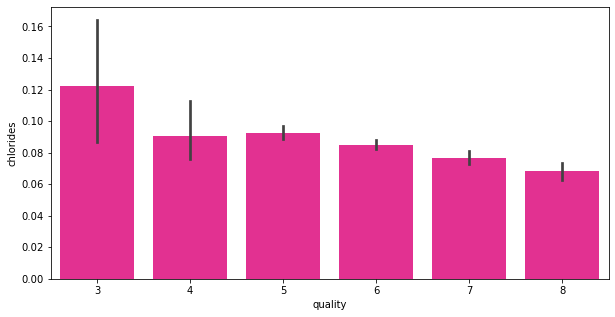

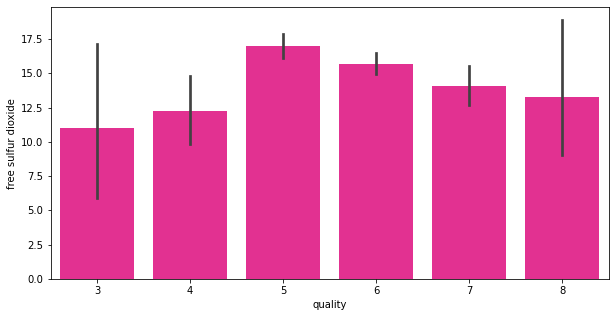

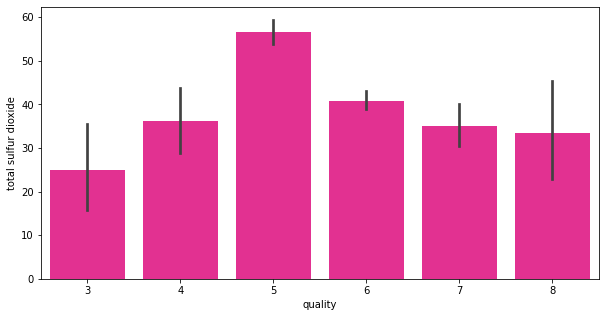

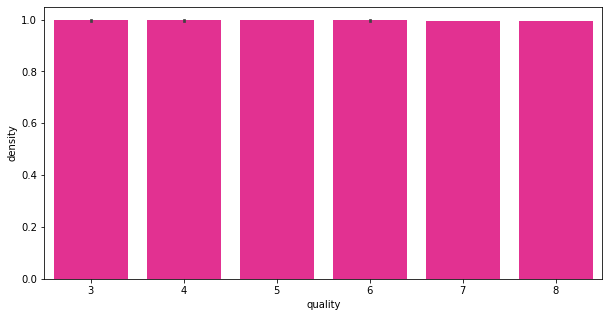

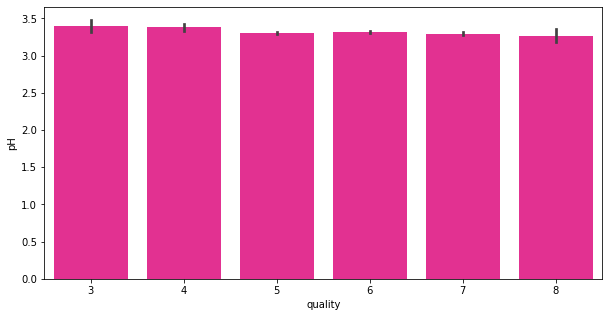

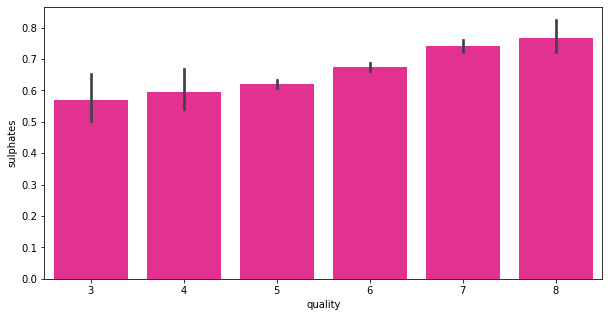

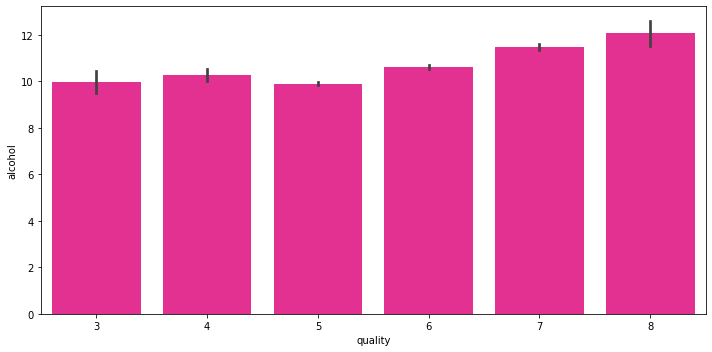

In [17]:
index=0
labels = df['quality']
features = df.drop('quality', axis=1)

for col in features.items():
    plt.figure(figsize=(10,5))
    sns.barplot(x=labels, y=col[index], data=df, color="deeppink")
plt.tight_layout()
plt.show()

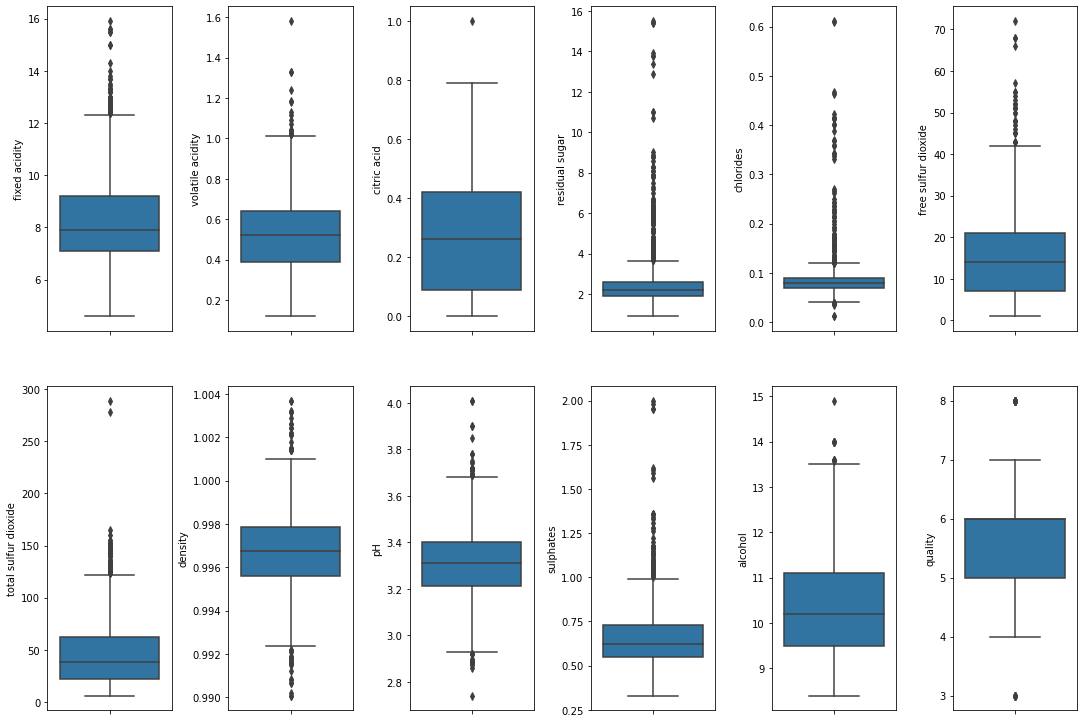

In [18]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(15,10))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

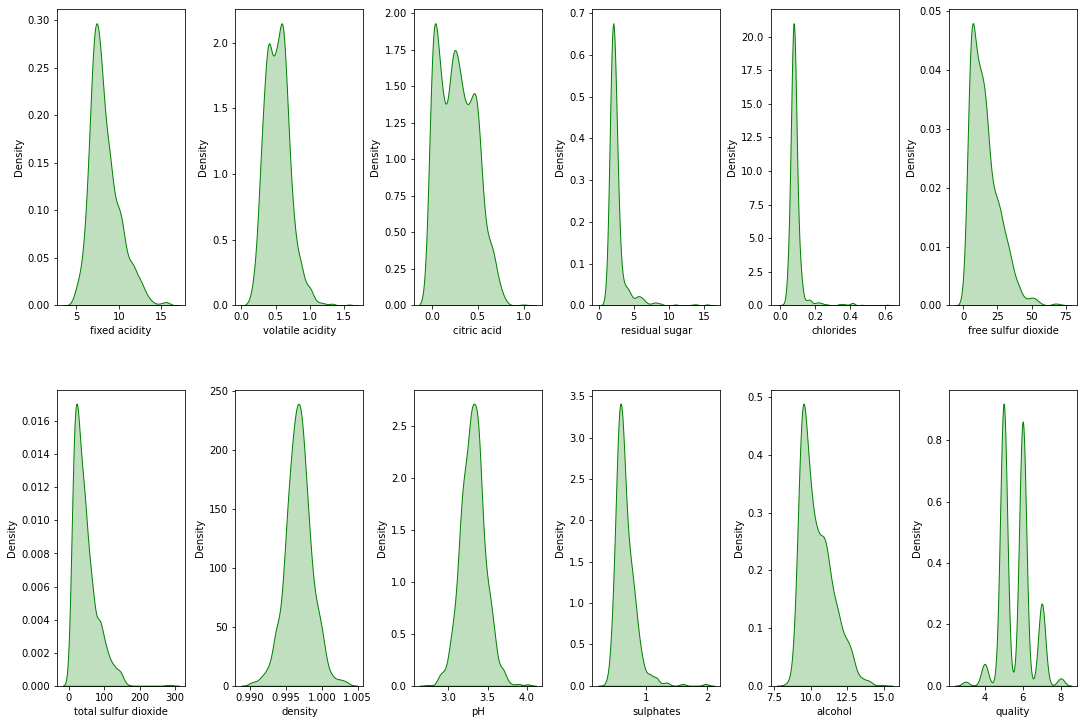

In [19]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(15,10))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.distplot(value, ax=ax[index], hist=False, color="g", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

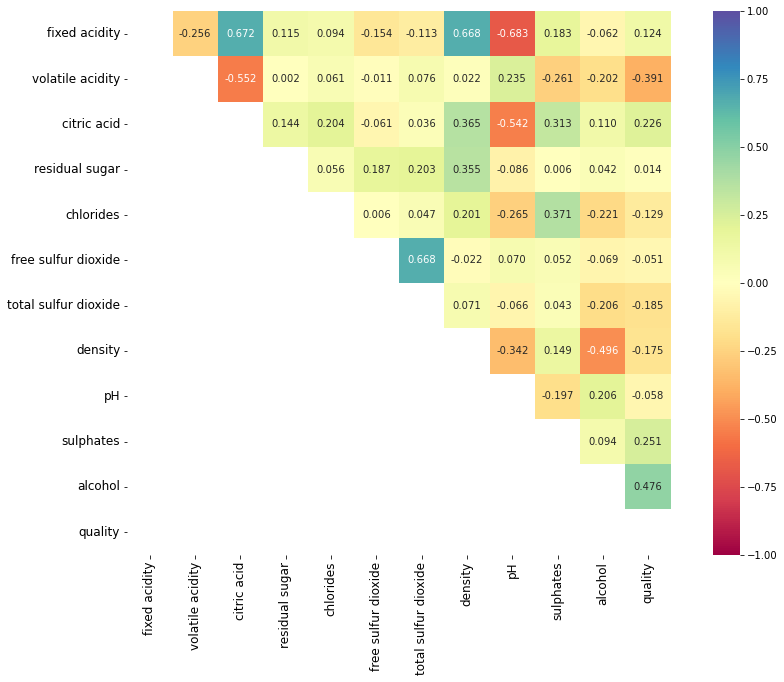

In [20]:
lower_triangle = np.tril(df.corr())
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="Spectral", mask=lower_triangle)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


In [21]:
df = df.drop('free sulfur dioxide', axis=1)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,44.0,0.99547,3.57,0.71,10.2,5


In [22]:
df.shape

(1599, 11)

In [23]:
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

df=df[(z<3).all(axis=1)]
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,44.0,0.99547,3.57,0.71,10.2,5


In [24]:
data_loss=(1599-1464)/1599*100 
data_loss

8.442776735459661

In [25]:
X = df.drop('quality', axis=1)
Y = df['quality']

In [26]:
Y.value_counts()

5    624
6    590
7    187
4     47
8     16
Name: quality, dtype: int64

In [27]:
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [28]:
Y.value_counts()

5    624
6    624
7    624
4    624
8    624
Name: quality, dtype: int64

In [29]:
Y

0       5
1       5
2       5
3       6
4       5
       ..
3115    8
3116    8
3117    8
3118    8
3119    8
Name: quality, Length: 3120, dtype: int64

In [30]:
Y = Y.apply(lambda y_value:1 if y_value>=7 else 0) # 1 is for good quality and 0 for bad (not good) quality
Y

0       0
1       0
2       0
3       0
4       0
       ..
3115    1
3116    1
3117    1
3118    1
3119    1
Name: quality, Length: 3120, dtype: int64

In [31]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.400000,0.700000,0.000000,1.900000,0.076000,34.000000,0.997800,3.510000,0.560000,9.400000
1,7.800000,0.880000,0.000000,2.600000,0.098000,67.000000,0.996800,3.200000,0.680000,9.800000
2,7.800000,0.760000,0.040000,2.300000,0.092000,54.000000,0.997000,3.260000,0.650000,9.800000
3,11.200000,0.280000,0.560000,1.900000,0.075000,60.000000,0.998000,3.160000,0.580000,9.800000
4,7.400000,0.700000,0.000000,1.900000,0.076000,34.000000,0.997800,3.510000,0.560000,9.400000
...,...,...,...,...,...,...,...,...,...,...
3115,10.749838,0.372427,0.541629,2.815965,0.071329,16.249191,0.997333,3.155814,0.653323,11.199352
3116,7.823158,0.519052,0.175686,2.601058,0.068011,43.147334,0.994895,3.434526,0.767790,12.723158
3117,9.712921,0.300978,0.575646,2.741327,0.079218,18.173454,0.996625,3.123597,0.910221,11.514203
3118,7.972368,0.528421,0.350614,2.514474,0.076193,17.000000,0.992545,3.197588,0.729649,13.032457


In [32]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.659107,1.067967,-1.511899,-0.635220,-0.154610,-0.098540,0.843356,1.449862,-0.795658,-1.256584
1,-0.410719,2.094844,-1.511899,0.135167,1.051503,1.158537,0.227374,-0.761049,0.109132,-0.900034
2,-0.410719,1.410259,-1.307607,-0.194999,0.722563,0.663325,0.350571,-0.333131,-0.117065,-0.900034
3,1.700580,-1.328081,1.348188,-0.635220,-0.209433,0.891885,0.966552,-1.046328,-0.644860,-0.900034
4,-0.659107,1.067967,-1.511899,-0.635220,-0.154610,-0.098540,0.843356,1.449862,-0.795658,-1.256584
...,...,...,...,...,...,...,...,...,...,...
3115,1.421043,-0.800795,1.254361,0.372848,-0.410689,-0.774726,0.555632,-1.076179,-0.092014,0.347317
3116,-0.396338,0.035679,-0.614619,0.136332,-0.592616,0.249912,-0.946159,0.911583,0.771061,1.705602
3117,0.777148,-1.208405,1.428097,0.290705,0.021795,-0.701425,0.119524,-1.305951,1.844981,0.627967
3118,-0.303684,0.089131,0.278791,0.041041,-0.144030,-0.746125,-2.393383,-0.778253,0.483482,1.981304


In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=21)

In [34]:
def classify(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=21)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # Accuracy Score
    acc_score = (accuracy_score(Y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Classification Report
    class_report = classification_report(Y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

In [35]:
model=LogisticRegression()
classify(model, X, Y)

Accuracy Score: 88.62179487179486

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.90      0.91       391
           1       0.84      0.86      0.85       233

    accuracy                           0.89       624
   macro avg       0.88      0.88      0.88       624
weighted avg       0.89      0.89      0.89       624

Cross Validation Score: 87.78846153846155

Accuracy Score - Cross Validation Score is 0.8333333333333144


In [36]:
model=SVC(C=1.0, kernel='rbf', gamma='auto', random_state=42)
classify(model, X, Y)

Accuracy Score: 91.18589743589743

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       391
           1       0.88      0.88      0.88       233

    accuracy                           0.91       624
   macro avg       0.91      0.91      0.91       624
weighted avg       0.91      0.91      0.91       624

Cross Validation Score: 89.90384615384615

Accuracy Score - Cross Validation Score is 1.2820512820512846


In [37]:
model=DecisionTreeClassifier(random_state=21, max_depth=15)
classify(model, X, Y)

Accuracy Score: 91.66666666666666

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.93       391
           1       0.89      0.88      0.89       233

    accuracy                           0.92       624
   macro avg       0.91      0.91      0.91       624
weighted avg       0.92      0.92      0.92       624

Cross Validation Score: 89.2628205128205

Accuracy Score - Cross Validation Score is 2.4038461538461604


In [38]:
model=RandomForestClassifier(max_depth=15, random_state=111)
classify(model, X, Y)

Accuracy Score: 95.51282051282051

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96       391
           1       0.93      0.95      0.94       233

    accuracy                           0.96       624
   macro avg       0.95      0.95      0.95       624
weighted avg       0.96      0.96      0.96       624

Cross Validation Score: 92.66025641025641

Accuracy Score - Cross Validation Score is 2.852564102564102


In [39]:
model=KNeighborsClassifier(n_neighbors=15)
classify(model, X, Y)

Accuracy Score: 89.74358974358975

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.90      0.92       391
           1       0.84      0.90      0.87       233

    accuracy                           0.90       624
   macro avg       0.89      0.90      0.89       624
weighted avg       0.90      0.90      0.90       624

Cross Validation Score: 87.91666666666667

Accuracy Score - Cross Validation Score is 1.8269230769230802


In [40]:
model=ExtraTreesClassifier()
classify(model, X, Y)

Accuracy Score: 95.3525641025641

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96       391
           1       0.93      0.94      0.94       233

    accuracy                           0.95       624
   macro avg       0.95      0.95      0.95       624
weighted avg       0.95      0.95      0.95       624

Cross Validation Score: 93.17307692307693

Accuracy Score - Cross Validation Score is 2.179487179487168


In [41]:
model=xgb.XGBClassifier(verbosity=0)
classify(model, X, Y)

Accuracy Score: 95.1923076923077

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96       391
           1       0.93      0.94      0.94       233

    accuracy                           0.95       624
   macro avg       0.95      0.95      0.95       624
weighted avg       0.95      0.95      0.95       624

Cross Validation Score: 91.89102564102564

Accuracy Score - Cross Validation Score is 3.301282051282058


In [43]:
svc_param = {'kernel' : ['poly', 'sigmoid', 'rbf'],
             'gamma' : ['scale', 'auto'],
             'shrinking' : [True, False],
             'random_state' : [21,42,104],
             'probability' : [True, False],
             'decision_function_shape' : ['ovo', 'ovr'],
             'verbose' : [True, False]}

In [44]:
GSCV = GridSearchCV(SVC(), svc_param, cv=5)

In [45]:
GSCV.fit(X_train,Y_train)

[LibSVM].*
optimization finished, #iter = 1532
obj = -469.817783, rho = 0.503049
nSV = 578, nBSV = 513
Total nSV = 578
.*
optimization finished, #iter = 1947
obj = -443.532026, rho = 0.600329
nSV = 567, nBSV = 489
Total nSV = 567
.
*.*
optimization finished, #iter = 2295
obj = -458.370561, rho = 0.611217
nSV = 577, nBSV = 505
Total nSV = 577
.
*
optimization finished, #iter = 1953
obj = -424.175979, rho = 0.569812
nSV = 542, nBSV = 471
Total nSV = 542
.
*.*
optimization finished, #iter = 2625
obj = -451.531802, rho = 0.551161
nSV = 577, nBSV = 498
Total nSV = 577
...*....*..*
optimization finished, #iter = 9171
obj = -548.531808, rho = -0.589850
nSV = 692, nBSV = 594
Total nSV = 692
[LibSVM].*.*
optimization finished, #iter = 2249
obj = -475.997301, rho = 0.560854
nSV = 600, nBSV = 520
Total nSV = 600
.*
optimization finished, #iter = 1678
obj = -442.847694, rho = 0.554836
nSV = 568, nBSV = 488
Total nSV = 568
.*.*
optimization finished, #iter = 2138
obj = -425.261296, rho = 0.546194
n

[LibSVM].
*.*
optimization finished, #iter = 2823
obj = -452.664980, rho = 0.550636
nSV = 578, nBSV = 493
Total nSV = 578
.*.*
optimization finished, #iter = 1821
obj = -438.139931, rho = 0.531494
nSV = 552, nBSV = 475
Total nSV = 552
.
*.*
optimization finished, #iter = 2257
obj = -448.867818, rho = 0.567318
nSV = 563, nBSV = 492
Total nSV = 563
.*
optimization finished, #iter = 1735
obj = -448.672935, rho = 0.574137
nSV = 567, nBSV = 489
Total nSV = 567
.
*.*
optimization finished, #iter = 2196
obj = -455.233148, rho = 0.571264
nSV = 577, nBSV = 495
Total nSV = 577
..*
optimization finished, #iter = 2754
obj = -548.380500, rho = -0.568892
nSV = 688, nBSV = 591
Total nSV = 688
[LibSVM].
*
optimization finished, #iter = 1890
obj = -442.665785, rho = 0.513886
nSV = 565, nBSV = 485
Total nSV = 565
.*
optimization finished, #iter = 1479
obj = -434.499829, rho = 0.542563
nSV = 549, nBSV = 475
Total nSV = 549
.*
optimization finished, #iter = 1574
obj = -437.576093, rho = 0.542355
nSV = 549

.*
optimization finished, #iter = 1611
obj = -441.782103, rho = 0.556457
nSV = 561, nBSV = 487
Total nSV = 561
.
*
optimization finished, #iter = 1885
obj = -453.182807, rho = 0.553151
nSV = 577, nBSV = 497
Total nSV = 577
.
*
optimization finished, #iter = 1967
obj = -442.894322, rho = 0.569252
nSV = 568, nBSV = 482
Total nSV = 568
.
*.*
optimization finished, #iter = 2531
obj = -539.416488, rho = -0.577328
nSV = 679, nBSV = 589
Total nSV = 679
[LibSVM].*.*
optimization finished, #iter = 2245
obj = -415.534095, rho = 0.546939
nSV = 535, nBSV = 458
Total nSV = 535
.*
optimization finished, #iter = 1734
obj = -427.306522, rho = 0.582830
nSV = 545, nBSV = 472
Total nSV = 545
.*
optimization finished, #iter = 1720
obj = -441.168782, rho = 0.513949
nSV = 558, nBSV = 481
Total nSV = 558
.*.*
optimization finished, #iter = 2354
obj = -447.713423, rho = 0.541662
nSV = 570, nBSV = 489
Total nSV = 570
.*
optimization finished, #iter = 1883
obj = -427.898500, rho = 0.497134
nSV = 543, nBSV = 468

[LibSVM]*
optimization finished, #iter = 321
obj = -1352.161454, rho = 3.036433
nSV = 358, nBSV = 353
Total nSV = 358
*
optimization finished, #iter = 272
obj = -1182.418060, rho = 2.962319
nSV = 343, nBSV = 338
Total nSV = 343
*
optimization finished, #iter = 357
obj = -1451.477912, rho = 2.328457
nSV = 375, nBSV = 369
Total nSV = 375
*
optimization finished, #iter = 393
obj = -1183.387010, rho = 2.414118
nSV = 378, nBSV = 375
Total nSV = 378
*
optimization finished, #iter = 359
obj = -1351.188331, rho = 2.034738
nSV = 353, nBSV = 348
Total nSV = 353
*
optimization finished, #iter = 419
obj = -1996.867220, rho = -2.844328
nSV = 435, nBSV = 431
Total nSV = 435
[LibSVM]*
optimization finished, #iter = 295
obj = -1326.429085, rho = 1.547852
nSV = 380, nBSV = 375
Total nSV = 380
*
optimization finished, #iter = 314
obj = -1203.474878, rho = 2.170450
nSV = 359, nBSV = 354
Total nSV = 359
*
optimization finished, #iter = 340
obj = -1172.613967, rho = 1.794425
nSV = 386, nBSV = 381
Total nSV

*
optimization finished, #iter = 297
obj = -1823.735691, rho = -3.076385
nSV = 442, nBSV = 437
Total nSV = 442
[LibSVM]*
optimization finished, #iter = 367
obj = -1244.653450, rho = 2.612316
nSV = 343, nBSV = 338
Total nSV = 343
*
optimization finished, #iter = 353
obj = -1427.033887, rho = 2.082263
nSV = 406, nBSV = 401
Total nSV = 406
*
optimization finished, #iter = 264
obj = -1515.927428, rho = 1.714146
nSV = 381, nBSV = 378
Total nSV = 381
*
optimization finished, #iter = 256
obj = -1321.892825, rho = 2.586851
nSV = 353, nBSV = 349
Total nSV = 353
*
optimization finished, #iter = 315
obj = -1437.205749, rho = 2.118863
nSV = 423, nBSV = 418
Total nSV = 423
*
optimization finished, #iter = 574
obj = -1907.292949, rho = -2.749076
nSV = 495, nBSV = 490
Total nSV = 495
[LibSVM]*
optimization finished, #iter = 251
obj = -1114.327294, rho = 2.654626
nSV = 338, nBSV = 333
Total nSV = 338
*
optimization finished, #iter = 415
obj = -1236.011440, rho = 2.201335
nSV = 388, nBSV = 384
Total nS

*
optimization finished, #iter = 338
obj = -1219.094455, rho = 2.577710
nSV = 369, nBSV = 363
Total nSV = 369
*
optimization finished, #iter = 419
obj = -1996.867220, rho = -2.844328
nSV = 435, nBSV = 431
Total nSV = 435
[LibSVM]*
optimization finished, #iter = 296
obj = -1340.536507, rho = 1.988435
nSV = 371, nBSV = 367
Total nSV = 371
*
optimization finished, #iter = 276
obj = -1246.862058, rho = 2.013359
nSV = 352, nBSV = 348
Total nSV = 352
*
optimization finished, #iter = 294
obj = -1163.508344, rho = 2.230289
nSV = 347, nBSV = 340
Total nSV = 347
*
optimization finished, #iter = 406
obj = -1290.268964, rho = 1.302463
nSV = 410, nBSV = 406
Total nSV = 410
*
optimization finished, #iter = 245
obj = -1304.577905, rho = 2.010394
nSV = 359, nBSV = 354
Total nSV = 359
*
optimization finished, #iter = 383
obj = -1722.478814, rho = -2.799077
nSV = 416, nBSV = 410
Total nSV = 416
[LibSVM]*
optimization finished, #iter = 584
obj = -1427.709072, rho = 1.747237
nSV = 376, nBSV = 371
Total nS

[LibSVM]*
optimization finished, #iter = 682
obj = -340.409648, rho = 1.050345
nSV = 448, nBSV = 358
Total nSV = 448
*
optimization finished, #iter = 688
obj = -330.820507, rho = 0.938243
nSV = 443, nBSV = 349
Total nSV = 443
*
optimization finished, #iter = 695
obj = -330.583733, rho = 0.909121
nSV = 451, nBSV = 351
Total nSV = 451
*
optimization finished, #iter = 777
obj = -340.034991, rho = 1.057585
nSV = 456, nBSV = 356
Total nSV = 456
*
optimization finished, #iter = 721
obj = -338.926530, rho = 0.966688
nSV = 453, nBSV = 350
Total nSV = 453
*
optimization finished, #iter = 879
obj = -410.614944, rho = -1.058365
nSV = 543, nBSV = 427
Total nSV = 543
[LibSVM]*
optimization finished, #iter = 709
obj = -345.891045, rho = 0.930130
nSV = 452, nBSV = 358
Total nSV = 452
*
optimization finished, #iter = 724
obj = -323.564485, rho = 0.781722
nSV = 432, nBSV = 337
Total nSV = 432
*
optimization finished, #iter = 732
obj = -323.833349, rho = 0.812475
nSV = 441, nBSV = 340
Total nSV = 441
*


*
optimization finished, #iter = 705
obj = -329.848616, rho = 0.885788
nSV = 451, nBSV = 352
Total nSV = 451
*
optimization finished, #iter = 751
obj = -330.970084, rho = 0.908675
nSV = 450, nBSV = 351
Total nSV = 450
*
optimization finished, #iter = 940
obj = -413.117802, rho = -0.944911
nSV = 558, nBSV = 443
Total nSV = 558
[LibSVM]*
optimization finished, #iter = 729
obj = -350.434805, rho = 0.870669
nSV = 470, nBSV = 377
Total nSV = 470
*
optimization finished, #iter = 767
obj = -329.348334, rho = 0.792498
nSV = 450, nBSV = 350
Total nSV = 450
*
optimization finished, #iter = 651
obj = -341.356754, rho = 0.821469
nSV = 462, nBSV = 371
Total nSV = 462
*
optimization finished, #iter = 660
obj = -320.768453, rho = 0.899084
nSV = 438, nBSV = 344
Total nSV = 438
*
optimization finished, #iter = 656
obj = -343.997926, rho = 0.886132
nSV = 461, nBSV = 367
Total nSV = 461
*
optimization finished, #iter = 771
obj = -414.392596, rho = -0.927524
nSV = 544, nBSV = 449
Total nSV = 544
[LibSVM]*

[LibSVM]*
optimization finished, #iter = 710
obj = -347.042243, rho = 0.908320
nSV = 469, nBSV = 367
Total nSV = 469
*
optimization finished, #iter = 721
obj = -326.592672, rho = 0.929300
nSV = 440, nBSV = 339
Total nSV = 440
*
optimization finished, #iter = 730
obj = -330.504292, rho = 0.999874
nSV = 445, nBSV = 344
Total nSV = 445
*
optimization finished, #iter = 739
obj = -344.613617, rho = 0.978756
nSV = 463, nBSV = 364
Total nSV = 463
*
optimization finished, #iter = 829
obj = -331.675630, rho = 1.011854
nSV = 456, nBSV = 348
Total nSV = 456
*
optimization finished, #iter = 879
obj = -410.614944, rho = -1.058365
nSV = 543, nBSV = 427
Total nSV = 543
[LibSVM]*
optimization finished, #iter = 707
obj = -327.253255, rho = 0.848955
nSV = 443, nBSV = 349
Total nSV = 443
*
optimization finished, #iter = 694
obj = -322.711140, rho = 0.810876
nSV = 440, nBSV = 341
Total nSV = 440
*
optimization finished, #iter = 640
obj = -333.660542, rho = 0.901207
nSV = 439, nBSV = 360
Total nSV = 439
*


.*
optimization finished, #iter = 1294
obj = -441.167481, rho = 0.529788
nSV = 554, nBSV = 490
Total nSV = 554
.*
optimization finished, #iter = 1512
obj = -411.926471, rho = 0.575580
nSV = 528, nBSV = 459
Total nSV = 528
.
*.*.*
optimization finished, #iter = 2709
obj = -526.120936, rho = -0.552597
nSV = 656, nBSV = 576
Total nSV = 656
[LibSVM].*
optimization finished, #iter = 1514
obj = -471.994441, rho = 0.502897
nSV = 578, nBSV = 517
Total nSV = 578
..*
optimization finished, #iter = 2244
obj = -445.829862, rho = 0.596974
nSV = 569, nBSV = 492
Total nSV = 569
..*
optimization finished, #iter = 2057
obj = -460.774219, rho = 0.609715
nSV = 578, nBSV = 509
Total nSV = 578
..*
optimization finished, #iter = 2110
obj = -426.496610, rho = 0.568946
nSV = 542, nBSV = 473
Total nSV = 542
..*
optimization finished, #iter = 2195
obj = -453.929419, rho = 0.548562
nSV = 575, nBSV = 499
Total nSV = 575
......*
optimization finished, #iter = 6221
obj = -551.209676, rho = -0.589946
nSV = 690, nBSV

[LibSVM]..*
optimization finished, #iter = 2346
obj = -459.906706, rho = 0.560931
nSV = 580, nBSV = 501
Total nSV = 580
.*
optimization finished, #iter = 1453
obj = -434.883250, rho = 0.524270
nSV = 545, nBSV = 481
Total nSV = 545
.*
optimization finished, #iter = 1561
obj = -458.818353, rho = 0.553255
nSV = 574, nBSV = 512
Total nSV = 574
.*
optimization finished, #iter = 1718
obj = -423.273099, rho = 0.574749
nSV = 535, nBSV = 470
Total nSV = 535
..*
optimization finished, #iter = 2242
obj = -462.521637, rho = 0.542188
nSV = 587, nBSV = 505
Total nSV = 587
..*
optimization finished, #iter = 2627
obj = -549.315590, rho = -0.569353
nSV = 682, nBSV = 604
Total nSV = 682
[LibSVM]..*
optimization finished, #iter = 2489
obj = -457.078600, rho = 0.550513
nSV = 576, nBSV = 497
Total nSV = 576
.*
optimization finished, #iter = 1806
obj = -442.184586, rho = 0.532615
nSV = 552, nBSV = 483
Total nSV = 552
..*
optimization finished, #iter = 2151
obj = -453.219394, rho = 0.568606
nSV = 569, nBSV =

.*
optimization finished, #iter = 1992
obj = -445.697811, rho = 0.584501
nSV = 561, nBSV = 490
Total nSV = 561
.*
optimization finished, #iter = 1896
obj = -467.293846, rho = 0.553193
nSV = 586, nBSV = 512
Total nSV = 586
.*
optimization finished, #iter = 1758
obj = -451.158514, rho = 0.550860
nSV = 572, nBSV = 496
Total nSV = 572
..*
optimization finished, #iter = 2913
obj = -553.306324, rho = -0.566184
nSV = 689, nBSV = 595
Total nSV = 689
[LibSVM].*
optimization finished, #iter = 1517
obj = -440.487411, rho = 0.536199
nSV = 548, nBSV = 486
Total nSV = 548
.*
optimization finished, #iter = 1677
obj = -431.742779, rho = 0.606460
nSV = 547, nBSV = 477
Total nSV = 547
.*
optimization finished, #iter = 1671
obj = -446.035624, rho = 0.551323
nSV = 562, nBSV = 487
Total nSV = 562
..*
optimization finished, #iter = 2060
obj = -457.501793, rho = 0.553458
nSV = 576, nBSV = 501
Total nSV = 576
..*
optimization finished, #iter = 2011
obj = -447.241071, rho = 0.567447
nSV = 567, nBSV = 489
Total

*
optimization finished, #iter = 275
obj = -1342.559984, rho = 2.355579
nSV = 370, nBSV = 365
Total nSV = 370
*
optimization finished, #iter = 423
obj = -1868.584461, rho = -2.469314
nSV = 494, nBSV = 489
Total nSV = 494
[LibSVM]*
optimization finished, #iter = 298
obj = -1266.654893, rho = 2.906469
nSV = 366, nBSV = 360
Total nSV = 366
*
optimization finished, #iter = 299
obj = -1281.441228, rho = 2.442106
nSV = 352, nBSV = 345
Total nSV = 352
*
optimization finished, #iter = 422
obj = -1384.167839, rho = 2.416395
nSV = 359, nBSV = 353
Total nSV = 359
*
optimization finished, #iter = 262
obj = -1114.514074, rho = 2.803665
nSV = 355, nBSV = 349
Total nSV = 355
*
optimization finished, #iter = 233
obj = -1186.476610, rho = 2.016974
nSV = 337, nBSV = 332
Total nSV = 337
*
optimization finished, #iter = 460
obj = -1910.590551, rho = -2.691899
nSV = 435, nBSV = 427
Total nSV = 435
[LibSVM]*
optimization finished, #iter = 310
obj = -1319.208106, rho = 2.761697
nSV = 356, nBSV = 352
Total nS

*
optimization finished, #iter = 311
obj = -1288.593483, rho = 1.934287
nSV = 359, nBSV = 353
Total nSV = 359
*
optimization finished, #iter = 253
obj = -1176.919800, rho = 2.348946
nSV = 346, nBSV = 341
Total nSV = 346
*
optimization finished, #iter = 298
obj = -1329.968798, rho = 1.719455
nSV = 409, nBSV = 403
Total nSV = 409
*
optimization finished, #iter = 506
obj = -1723.491365, rho = -2.764424
nSV = 448, nBSV = 443
Total nSV = 448
[LibSVM]*
optimization finished, #iter = 300
obj = -1228.076251, rho = 2.223002
nSV = 357, nBSV = 352
Total nSV = 357
*
optimization finished, #iter = 489
obj = -1305.829330, rho = 2.773378
nSV = 398, nBSV = 394
Total nSV = 398
*
optimization finished, #iter = 496
obj = -1263.356867, rho = 1.264820
nSV = 383, nBSV = 377
Total nSV = 383
*
optimization finished, #iter = 264
obj = -1279.110280, rho = 2.230039
nSV = 360, nBSV = 355
Total nSV = 360
*
optimization finished, #iter = 404
obj = -1294.902454, rho = 1.968695
nSV = 406, nBSV = 400
Total nSV = 406
*

[LibSVM]*
optimization finished, #iter = 259
obj = -1314.517450, rho = 2.240474
nSV = 343, nBSV = 340
Total nSV = 343
*
optimization finished, #iter = 413
obj = -1200.925301, rho = 2.383450
nSV = 382, nBSV = 376
Total nSV = 382
*
optimization finished, #iter = 338
obj = -1311.323065, rho = 1.849583
nSV = 402, nBSV = 397
Total nSV = 402
*
optimization finished, #iter = 275
obj = -1311.001922, rho = 2.220929
nSV = 358, nBSV = 353
Total nSV = 358
*
optimization finished, #iter = 311
obj = -1109.981349, rho = 3.031846
nSV = 349, nBSV = 343
Total nSV = 349
*
optimization finished, #iter = 460
obj = -1910.590551, rho = -2.691899
nSV = 435, nBSV = 427
Total nSV = 435
[LibSVM]*
optimization finished, #iter = 698
obj = -1967.857600, rho = -2.854100
nSV = 437, nBSV = 432
Total nSV = 437
[LibSVM]*
optimization finished, #iter = 506
obj = -1723.491365, rho = -2.764424
nSV = 448, nBSV = 443
Total nSV = 448
[LibSVM]*
optimization finished, #iter = 278
obj = -1776.928651, rho = -2.955355
nSV = 442, n

[LibSVM]*
optimization finished, #iter = 671
obj = -352.523928, rho = 0.916264
nSV = 476, nBSV = 379
Total nSV = 476
*
optimization finished, #iter = 663
obj = -334.955227, rho = 0.823828
nSV = 450, nBSV = 358
Total nSV = 450
*
optimization finished, #iter = 693
obj = -331.779107, rho = 0.866943
nSV = 441, nBSV = 348
Total nSV = 441
*
optimization finished, #iter = 706
obj = -337.243343, rho = 0.860131
nSV = 455, nBSV = 355
Total nSV = 455
*
optimization finished, #iter = 688
obj = -338.369299, rho = 0.784555
nSV = 452, nBSV = 361
Total nSV = 452
*
optimization finished, #iter = 788
obj = -415.110182, rho = -0.930152
nSV = 543, nBSV = 451
Total nSV = 543
[LibSVM]*
optimization finished, #iter = 865
obj = -362.903299, rho = 0.910944
nSV = 486, nBSV = 387
Total nSV = 486
*
optimization finished, #iter = 714
obj = -341.214883, rho = 0.844864
nSV = 456, nBSV = 360
Total nSV = 456
*
optimization finished, #iter = 763
obj = -346.277931, rho = 0.966671
nSV = 466, nBSV = 368
Total nSV = 466
*


*
optimization finished, #iter = 817
obj = -347.216225, rho = 1.015096
nSV = 462, nBSV = 369
Total nSV = 462
*
optimization finished, #iter = 916
obj = -412.383992, rho = -1.066812
nSV = 546, nBSV = 435
Total nSV = 546
[LibSVM]*
optimization finished, #iter = 695
obj = -323.630086, rho = 0.869640
nSV = 441, nBSV = 338
Total nSV = 441
*
optimization finished, #iter = 805
obj = -322.142499, rho = 0.817219
nSV = 443, nBSV = 334
Total nSV = 443
*
optimization finished, #iter = 781
obj = -320.327435, rho = 0.808347
nSV = 440, nBSV = 345
Total nSV = 440
*
optimization finished, #iter = 653
obj = -342.485501, rho = 0.834665
nSV = 450, nBSV = 358
Total nSV = 450
*
optimization finished, #iter = 635
obj = -335.602141, rho = 0.910858
nSV = 446, nBSV = 349
Total nSV = 446
*
optimization finished, #iter = 871
obj = -402.106024, rho = -0.888392
nSV = 538, nBSV = 421
Total nSV = 538
[LibSVM]*
optimization finished, #iter = 800
obj = -346.848290, rho = 0.819758
nSV = 477, nBSV = 361
Total nSV = 477
*

[LibSVM]*
optimization finished, #iter = 857
obj = -426.507122, rho = -0.988368
nSV = 565, nBSV = 456
Total nSV = 565
[LibSVM]*
optimization finished, #iter = 916
obj = -412.383992, rho = -1.066812
nSV = 546, nBSV = 435
Total nSV = 546
[LibSVM]*
optimization finished, #iter = 871
obj = -402.106024, rho = -0.888392
nSV = 538, nBSV = 421
Total nSV = 538
[LibSVM]*
optimization finished, #iter = 990
obj = -414.086512, rho = -0.949136
nSV = 557, nBSV = 443
Total nSV = 557
[LibSVM]*
optimization finished, #iter = 788
obj = -415.110182, rho = -0.930152
nSV = 543, nBSV = 451
Total nSV = 543
[LibSVM]*
optimization finished, #iter = 857
obj = -426.507122, rho = -0.988368
nSV = 565, nBSV = 456
Total nSV = 565
[LibSVM]*
optimization finished, #iter = 916
obj = -412.383992, rho = -1.066812
nSV = 546, nBSV = 435
Total nSV = 546
[LibSVM]*
optimization finished, #iter = 871
obj = -402.106024, rho = -0.888392
nSV = 538, nBSV = 421
Total nSV = 538
[LibSVM]*
optimization finished, #iter = 990
obj = -414.

[LibSVM].*
optimization finished, #iter = 1439
obj = -452.262981, rho = 0.550483
nSV = 567, nBSV = 498
Total nSV = 567
.*
optimization finished, #iter = 1900
obj = -435.351603, rho = 0.534392
nSV = 550, nBSV = 476
Total nSV = 550
.*
optimization finished, #iter = 1908
obj = -424.710472, rho = 0.573672
nSV = 542, nBSV = 476
Total nSV = 542
.*
optimization finished, #iter = 1777
obj = -450.402670, rho = 0.547401
nSV = 560, nBSV = 489
Total nSV = 560
..*
optimization finished, #iter = 2296
obj = -430.560694, rho = 0.607349
nSV = 553, nBSV = 476
Total nSV = 553
..*
optimization finished, #iter = 2293
obj = -539.416486, rho = -0.577374
nSV = 673, nBSV = 592
Total nSV = 673
[LibSVM].*
optimization finished, #iter = 1902
obj = -459.624225, rho = 0.532777
nSV = 573, nBSV = 502
Total nSV = 573
..*
optimization finished, #iter = 2477
obj = -425.401890, rho = 0.511930
nSV = 541, nBSV = 466
Total nSV = 541
.*
optimization finished, #iter = 1990
obj = -417.494016, rho = 0.553982
nSV = 532, nBSV = 4

[LibSVM].*.*
optimization finished, #iter = 2047
obj = -438.901846, rho = 0.556526
nSV = 554, nBSV = 474
Total nSV = 554
.
*.*
optimization finished, #iter = 2167
obj = -464.831154, rho = 0.536499
nSV = 590, nBSV = 501
Total nSV = 590
.
*..*.*
optimization finished, #iter = 4149
obj = -442.382755, rho = 0.623189
nSV = 563, nBSV = 485
Total nSV = 563
.
*.*
optimization finished, #iter = 2842
obj = -464.415818, rho = 0.571909
nSV = 589, nBSV = 512
Total nSV = 589
..*
optimization finished, #iter = 2402
obj = -433.012405, rho = 0.564175
nSV = 559, nBSV = 478
Total nSV = 559
...*....*..*
optimization finished, #iter = 9171
obj = -548.531808, rho = -0.589850
nSV = 692, nBSV = 594
Total nSV = 692
[LibSVM].*
optimization finished, #iter = 1769
obj = -436.968110, rho = 0.560207
nSV = 561, nBSV = 486
Total nSV = 561
.
*
optimization finished, #iter = 1800
obj = -441.066882, rho = 0.572467
nSV = 557, nBSV = 479
Total nSV = 557
.
*.*
optimization finished, #iter = 2912
obj = -434.983311, rho = 0.

[LibSVM]..*
optimization finished, #iter = 2839
obj = -548.380504, rho = -0.568887
nSV = 681, nBSV = 591
Total nSV = 681
[LibSVM]..*
optimization finished, #iter = 2293
obj = -539.416486, rho = -0.577374
nSV = 673, nBSV = 592
Total nSV = 673
[LibSVM]..*
optimization finished, #iter = 2515
obj = -527.700700, rho = -0.551585
nSV = 653, nBSV = 582
Total nSV = 653
[LibSVM]...*....*..*
optimization finished, #iter = 9171
obj = -548.531808, rho = -0.589850
nSV = 692, nBSV = 594
Total nSV = 692
[LibSVM]..*.
*
optimization finished, #iter = 3295
obj = -547.304055, rho = -0.569759
nSV = 683, nBSV = 605
Total nSV = 683
[LibSVM]..*
optimization finished, #iter = 2754
obj = -548.380500, rho = -0.568892
nSV = 688, nBSV = 591
Total nSV = 688
[LibSVM].
*.*
optimization finished, #iter = 2531
obj = -539.416488, rho = -0.577328
nSV = 679, nBSV = 589
Total nSV = 679
[LibSVM]..*
optimization finished, #iter = 2611
obj = -527.700706, rho = -0.551680
nSV = 655, nBSV = 579
Total nSV = 655
[LibSVM]......*
op

*
optimization finished, #iter = 265
obj = -1556.865925, rho = 1.976441
nSV = 384, nBSV = 379
Total nSV = 384
*
optimization finished, #iter = 338
obj = -1182.118537, rho = 2.096604
nSV = 406, nBSV = 400
Total nSV = 406
*
optimization finished, #iter = 265
obj = -1374.933360, rho = 2.407709
nSV = 370, nBSV = 366
Total nSV = 370
*
optimization finished, #iter = 574
obj = -1907.292949, rho = -2.749076
nSV = 495, nBSV = 490
Total nSV = 495
[LibSVM]*
optimization finished, #iter = 295
obj = -1257.034165, rho = 2.892903
nSV = 366, nBSV = 360
Total nSV = 366
*
optimization finished, #iter = 253
obj = -1270.804621, rho = 2.350363
nSV = 352, nBSV = 345
Total nSV = 352
*
optimization finished, #iter = 479
obj = -1378.926876, rho = 2.264898
nSV = 355, nBSV = 350
Total nSV = 355
*
optimization finished, #iter = 344
obj = -1106.164010, rho = 2.762020
nSV = 357, nBSV = 351
Total nSV = 357
*
optimization finished, #iter = 241
obj = -1178.726456, rho = 2.055488
nSV = 334, nBSV = 330
Total nSV = 334
*

*
optimization finished, #iter = 338
obj = -1219.094455, rho = 2.577710
nSV = 369, nBSV = 363
Total nSV = 369
*
optimization finished, #iter = 419
obj = -1996.867220, rho = -2.844328
nSV = 435, nBSV = 431
Total nSV = 435
[LibSVM]*
optimization finished, #iter = 296
obj = -1340.536507, rho = 1.988435
nSV = 371, nBSV = 367
Total nSV = 371
*
optimization finished, #iter = 276
obj = -1246.862058, rho = 2.013359
nSV = 352, nBSV = 348
Total nSV = 352
*
optimization finished, #iter = 294
obj = -1163.508344, rho = 2.230289
nSV = 347, nBSV = 340
Total nSV = 347
*
optimization finished, #iter = 406
obj = -1290.268964, rho = 1.302463
nSV = 410, nBSV = 406
Total nSV = 410
*
optimization finished, #iter = 245
obj = -1304.577905, rho = 2.010394
nSV = 359, nBSV = 354
Total nSV = 359
*
optimization finished, #iter = 383
obj = -1722.478814, rho = -2.799077
nSV = 416, nBSV = 410
Total nSV = 416
[LibSVM]*
optimization finished, #iter = 584
obj = -1427.709072, rho = 1.747237
nSV = 376, nBSV = 371
Total nS

[LibSVM]*
optimization finished, #iter = 574
obj = -1907.292949, rho = -2.749076
nSV = 495, nBSV = 490
Total nSV = 495
[LibSVM]*
optimization finished, #iter = 450
obj = -1893.374420, rho = -2.591792
nSV = 436, nBSV = 428
Total nSV = 436
[LibSVM]*
optimization finished, #iter = 419
obj = -1996.867220, rho = -2.844328
nSV = 435, nBSV = 431
Total nSV = 435
[LibSVM]*
optimization finished, #iter = 383
obj = -1722.478814, rho = -2.799077
nSV = 416, nBSV = 410
Total nSV = 416
[LibSVM]*
optimization finished, #iter = 297
obj = -1823.735691, rho = -3.076385
nSV = 442, nBSV = 437
Total nSV = 442
[LibSVM]*
optimization finished, #iter = 574
obj = -1907.292949, rho = -2.749076
nSV = 495, nBSV = 490
Total nSV = 495
[LibSVM]*
optimization finished, #iter = 450
obj = -1893.374420, rho = -2.591792
nSV = 436, nBSV = 428
Total nSV = 436
[LibSVM]*
optimization finished, #iter = 419
obj = -1996.867220, rho = -2.844328
nSV = 435, nBSV = 431
Total nSV = 435
[LibSVM]*
optimization finished, #iter = 383
obj

*
optimization finished, #iter = 705
obj = -329.848616, rho = 0.885788
nSV = 451, nBSV = 352
Total nSV = 451
*
optimization finished, #iter = 751
obj = -330.970084, rho = 0.908675
nSV = 450, nBSV = 351
Total nSV = 450
*
optimization finished, #iter = 940
obj = -413.117802, rho = -0.944911
nSV = 558, nBSV = 443
Total nSV = 558
[LibSVM]*
optimization finished, #iter = 729
obj = -350.434805, rho = 0.870669
nSV = 470, nBSV = 377
Total nSV = 470
*
optimization finished, #iter = 767
obj = -329.348334, rho = 0.792498
nSV = 450, nBSV = 350
Total nSV = 450
*
optimization finished, #iter = 651
obj = -341.356754, rho = 0.821469
nSV = 462, nBSV = 371
Total nSV = 462
*
optimization finished, #iter = 660
obj = -320.768453, rho = 0.899084
nSV = 438, nBSV = 344
Total nSV = 438
*
optimization finished, #iter = 656
obj = -343.997926, rho = 0.886132
nSV = 461, nBSV = 367
Total nSV = 461
*
optimization finished, #iter = 771
obj = -414.392596, rho = -0.927524
nSV = 544, nBSV = 449
Total nSV = 544
[LibSVM]*

[LibSVM]*
optimization finished, #iter = 710
obj = -347.042243, rho = 0.908320
nSV = 469, nBSV = 367
Total nSV = 469
*
optimization finished, #iter = 721
obj = -326.592672, rho = 0.929300
nSV = 440, nBSV = 339
Total nSV = 440
*
optimization finished, #iter = 730
obj = -330.504292, rho = 0.999874
nSV = 445, nBSV = 344
Total nSV = 445
*
optimization finished, #iter = 739
obj = -344.613617, rho = 0.978756
nSV = 463, nBSV = 364
Total nSV = 463
*
optimization finished, #iter = 829
obj = -331.675630, rho = 1.011854
nSV = 456, nBSV = 348
Total nSV = 456
*
optimization finished, #iter = 879
obj = -410.614944, rho = -1.058365
nSV = 543, nBSV = 427
Total nSV = 543
[LibSVM]*
optimization finished, #iter = 707
obj = -327.253255, rho = 0.848955
nSV = 443, nBSV = 349
Total nSV = 443
*
optimization finished, #iter = 694
obj = -322.711140, rho = 0.810876
nSV = 440, nBSV = 341
Total nSV = 440
*
optimization finished, #iter = 640
obj = -333.660542, rho = 0.901207
nSV = 439, nBSV = 360
Total nSV = 439
*


.
*.*
optimization finished, #iter = 2175
obj = -453.929417, rho = 0.548599
nSV = 579, nBSV = 499
Total nSV = 579
...*.....*.*
optimization finished, #iter = 8584
obj = -551.209678, rho = -0.589938
nSV = 696, nBSV = 598
Total nSV = 696
[LibSVM].*.*
optimization finished, #iter = 2096
obj = -477.824151, rho = 0.561294
nSV = 600, nBSV = 520
Total nSV = 600
.*
optimization finished, #iter = 1760
obj = -444.594471, rho = 0.552886
nSV = 568, nBSV = 493
Total nSV = 568
.*.*
optimization finished, #iter = 2152
obj = -427.128099, rho = 0.543842
nSV = 562, nBSV = 479
Total nSV = 562
.
*..*
optimization finished, #iter = 3294
obj = -454.217778, rho = 0.569577
nSV = 581, nBSV = 495
Total nSV = 581
.
*.*
optimization finished, #iter = 2153
obj = -441.610875, rho = 0.549649
nSV = 567, nBSV = 490
Total nSV = 567
..*.
*
optimization finished, #iter = 3304
obj = -549.315596, rho = -0.569387
nSV = 684, nBSV = 603
Total nSV = 684
[LibSVM].*
optimization finished, #iter = 1673
obj = -478.441148, rho = 0.

[LibSVM]..*
optimization finished, #iter = 2457
obj = -457.078600, rho = 0.550537
nSV = 580, nBSV = 496
Total nSV = 580
.**.*
optimization finished, #iter = 1918
obj = -442.184590, rho = 0.532577
nSV = 557, nBSV = 483
Total nSV = 557
.
*.*
optimization finished, #iter = 2123
obj = -453.219393, rho = 0.568614
nSV = 569, nBSV = 497
Total nSV = 569
.*
optimization finished, #iter = 1757
obj = -453.047804, rho = 0.571583
nSV = 566, nBSV = 494
Total nSV = 566
.
*.*
optimization finished, #iter = 2218
obj = -459.548768, rho = 0.567529
nSV = 580, nBSV = 500
Total nSV = 580
..*
optimization finished, #iter = 2820
obj = -553.306323, rho = -0.566140
nSV = 693, nBSV = 595
Total nSV = 693
[LibSVM].
*
optimization finished, #iter = 1675
obj = -446.939343, rho = 0.513930
nSV = 569, nBSV = 489
Total nSV = 569
.*
optimization finished, #iter = 1841
obj = -438.631074, rho = 0.544230
nSV = 555, nBSV = 479
Total nSV = 555
.*
optimization finished, #iter = 1652
obj = -441.747611, rho = 0.540803
nSV = 551,

.*
optimization finished, #iter = 1671
obj = -446.035624, rho = 0.551319
nSV = 565, nBSV = 488
Total nSV = 565
.
*.*
optimization finished, #iter = 2060
obj = -457.501793, rho = 0.553454
nSV = 580, nBSV = 501
Total nSV = 580
.*
optimization finished, #iter = 1993
obj = -447.241071, rho = 0.567455
nSV = 572, nBSV = 488
Total nSV = 572
.
*.*.*
optimization finished, #iter = 2603
obj = -544.350909, rho = -0.572021
nSV = 680, nBSV = 594
Total nSV = 680
[LibSVM].*.*
optimization finished, #iter = 2182
obj = -414.145214, rho = 0.548234
nSV = 533, nBSV = 457
Total nSV = 533
.
*
optimization finished, #iter = 1849
obj = -425.962078, rho = 0.582735
nSV = 541, nBSV = 469
Total nSV = 541
.*
optimization finished, #iter = 1739
obj = -439.805386, rho = 0.514683
nSV = 557, nBSV = 480
Total nSV = 557
.
*.*
optimization finished, #iter = 2428
obj = -446.330604, rho = 0.542088
nSV = 565, nBSV = 487
Total nSV = 565
.*.*
optimization finished, #iter = 2035
obj = -426.543948, rho = 0.497529
nSV = 540, nBS

[LibSVM]..*
optimization finished, #iter = 2913
obj = -553.306324, rho = -0.566184
nSV = 689, nBSV = 595
Total nSV = 689
[LibSVM]..*
optimization finished, #iter = 2107
obj = -544.350911, rho = -0.572053
nSV = 678, nBSV = 598
Total nSV = 678
[LibSVM]..*
optimization finished, #iter = 2567
obj = -526.120933, rho = -0.552595
nSV = 653, nBSV = 579
Total nSV = 653
[LibSVM]*
optimization finished, #iter = 310
obj = -1319.208106, rho = 2.761697
nSV = 356, nBSV = 352
Total nSV = 356
*
optimization finished, #iter = 286
obj = -1303.632518, rho = 2.535929
nSV = 356, nBSV = 350
Total nSV = 356
*
optimization finished, #iter = 267
obj = -1431.984111, rho = 2.303060
nSV = 375, nBSV = 371
Total nSV = 375
*
optimization finished, #iter = 232
obj = -1264.844278, rho = 2.640949
nSV = 343, nBSV = 340
Total nSV = 343
*
optimization finished, #iter = 336
obj = -1333.147068, rho = 2.110848
nSV = 354, nBSV = 348
Total nSV = 354
*
optimization finished, #iter = 698
obj = -1967.857600, rho = -2.854100
nSV = 

[LibSVM]*
optimization finished, #iter = 300
obj = -1228.076251, rho = 2.223002
nSV = 357, nBSV = 352
Total nSV = 357
*
optimization finished, #iter = 489
obj = -1305.829330, rho = 2.773378
nSV = 398, nBSV = 394
Total nSV = 398
*
optimization finished, #iter = 496
obj = -1263.356867, rho = 1.264820
nSV = 383, nBSV = 377
Total nSV = 383
*
optimization finished, #iter = 264
obj = -1279.110280, rho = 2.230039
nSV = 360, nBSV = 355
Total nSV = 360
*
optimization finished, #iter = 404
obj = -1294.902454, rho = 1.968695
nSV = 406, nBSV = 400
Total nSV = 406
*
optimization finished, #iter = 278
obj = -1776.928651, rho = -2.955355
nSV = 442, nBSV = 437
Total nSV = 442
[LibSVM]*
optimization finished, #iter = 342
obj = -1213.069371, rho = 2.110945
nSV = 363, nBSV = 358
Total nSV = 363
*
optimization finished, #iter = 340
obj = -1394.264944, rho = 2.216732
nSV = 410, nBSV = 405
Total nSV = 410
*
optimization finished, #iter = 427
obj = -1361.779547, rho = 1.896483
nSV = 412, nBSV = 407
Total nSV

*
optimization finished, #iter = 460
obj = -1910.590551, rho = -2.691899
nSV = 435, nBSV = 427
Total nSV = 435
[LibSVM]*
optimization finished, #iter = 333
obj = -1254.444927, rho = 2.537988
nSV = 401, nBSV = 396
Total nSV = 401
*
optimization finished, #iter = 244
obj = -1236.105586, rho = 2.208954
nSV = 350, nBSV = 347
Total nSV = 350
*
optimization finished, #iter = 314
obj = -1344.016793, rho = 2.086886
nSV = 361, nBSV = 355
Total nSV = 361
*
optimization finished, #iter = 250
obj = -1354.694094, rho = 2.219962
nSV = 376, nBSV = 372
Total nSV = 376
*
optimization finished, #iter = 310
obj = -1264.294423, rho = 2.090704
nSV = 399, nBSV = 394
Total nSV = 399
*
optimization finished, #iter = 698
obj = -1967.857600, rho = -2.854100
nSV = 437, nBSV = 432
Total nSV = 437
[LibSVM]*
optimization finished, #iter = 284
obj = -1327.780692, rho = 1.980393
nSV = 371, nBSV = 367
Total nSV = 371
*
optimization finished, #iter = 297
obj = -1234.572942, rho = 2.013023
nSV = 353, nBSV = 349
Total nS

*
optimization finished, #iter = 714
obj = -341.214883, rho = 0.844864
nSV = 456, nBSV = 360
Total nSV = 456
*
optimization finished, #iter = 763
obj = -346.277931, rho = 0.966671
nSV = 466, nBSV = 368
Total nSV = 466
*
optimization finished, #iter = 724
obj = -345.765821, rho = 0.982495
nSV = 456, nBSV = 365
Total nSV = 456
*
optimization finished, #iter = 689
obj = -349.029081, rho = 0.933343
nSV = 472, nBSV = 373
Total nSV = 472
*
optimization finished, #iter = 857
obj = -426.507122, rho = -0.988368
nSV = 565, nBSV = 456
Total nSV = 565
[LibSVM]*
optimization finished, #iter = 669
obj = -341.743457, rho = 1.059576
nSV = 448, nBSV = 359
Total nSV = 448
*
optimization finished, #iter = 718
obj = -332.182388, rho = 0.946730
nSV = 445, nBSV = 349
Total nSV = 445
*
optimization finished, #iter = 709
obj = -332.005630, rho = 0.917107
nSV = 450, nBSV = 350
Total nSV = 450
*
optimization finished, #iter = 755
obj = -341.327910, rho = 1.066224
nSV = 452, nBSV = 354
Total nSV = 452
*
optimiza

*
optimization finished, #iter = 635
obj = -335.602141, rho = 0.910858
nSV = 446, nBSV = 349
Total nSV = 446
*
optimization finished, #iter = 871
obj = -402.106024, rho = -0.888392
nSV = 538, nBSV = 421
Total nSV = 538
[LibSVM]*
optimization finished, #iter = 805
obj = -355.794689, rho = 0.922308
nSV = 478, nBSV = 374
Total nSV = 478
*
optimization finished, #iter = 684
obj = -333.056686, rho = 0.873767
nSV = 446, nBSV = 355
Total nSV = 446
*
optimization finished, #iter = 763
obj = -345.592066, rho = 0.862268
nSV = 474, nBSV = 361
Total nSV = 474
*
optimization finished, #iter = 700
obj = -330.580657, rho = 0.890076
nSV = 449, nBSV = 356
Total nSV = 449
*
optimization finished, #iter = 716
obj = -331.692204, rho = 0.911602
nSV = 451, nBSV = 354
Total nSV = 451
*
optimization finished, #iter = 990
obj = -414.086512, rho = -0.949136
nSV = 557, nBSV = 443
Total nSV = 557
[LibSVM]*
optimization finished, #iter = 688
obj = -350.979143, rho = 0.872775
nSV = 469, nBSV = 376
Total nSV = 469
*

*
optimization finished, #iter = 758
obj = -360.031289, rho = 0.913464
nSV = 490, nBSV = 396
Total nSV = 490
*
optimization finished, #iter = 732
obj = -347.670475, rho = 0.985690
nSV = 469, nBSV = 374
Total nSV = 469
*
optimization finished, #iter = 857
obj = -426.507122, rho = -0.988368
nSV = 565, nBSV = 456
Total nSV = 565
[LibSVM]*
optimization finished, #iter = 765
obj = -348.452590, rho = 0.913966
nSV = 470, nBSV = 371
Total nSV = 470
*
optimization finished, #iter = 688
obj = -327.808381, rho = 0.936483
nSV = 440, nBSV = 341
Total nSV = 440
*
optimization finished, #iter = 699
obj = -331.808192, rho = 1.011142
nSV = 440, nBSV = 347
Total nSV = 440
*
optimization finished, #iter = 723
obj = -346.112408, rho = 0.987900
nSV = 464, nBSV = 370
Total nSV = 464
*
optimization finished, #iter = 771
obj = -333.087581, rho = 1.021973
nSV = 456, nBSV = 349
Total nSV = 456
*
optimization finished, #iter = 916
obj = -412.383992, rho = -1.066812
nSV = 546, nBSV = 435
Total nSV = 546
[LibSVM]*

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['poly', 'sigmoid', 'rbf'],
                         'probability': [True, False],
                         'random_state': [21, 42, 104],
                         'shrinking': [True, False], 'verbose': [True, False]})

In [46]:
GSCV.best_params_

{'decision_function_shape': 'ovo',
 'gamma': 'scale',
 'kernel': 'rbf',
 'probability': True,
 'random_state': 21,
 'shrinking': True,
 'verbose': True}

In [47]:
Final_Model = SVC(decision_function_shape='ovo', gamma='scale', kernel='rbf', probability=True, random_state=21,
                 shrinking=True, verbose=True)
Classifier = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_acc = (accuracy_score(Y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

[LibSVM]*
optimization finished, #iter = 895
obj = -404.328641, rho = 0.894198
nSV = 545, nBSV = 433
Total nSV = 545
*
optimization finished, #iter = 801
obj = -409.766776, rho = 0.949673
nSV = 546, nBSV = 440
Total nSV = 546
*
optimization finished, #iter = 880
obj = -413.479669, rho = 0.973422
nSV = 550, nBSV = 435
Total nSV = 550
*
optimization finished, #iter = 945
obj = -419.868014, rho = 1.075175
nSV = 558, nBSV = 448
Total nSV = 558
*
optimization finished, #iter = 789
obj = -419.657061, rho = 0.977203
nSV = 552, nBSV = 451
Total nSV = 552
*.*
optimization finished, #iter = 1103
obj = -504.106920, rho = -1.036719
nSV = 663, nBSV = 538
Total nSV = 663
Accuracy score for the Best Model is: 91.18589743589743


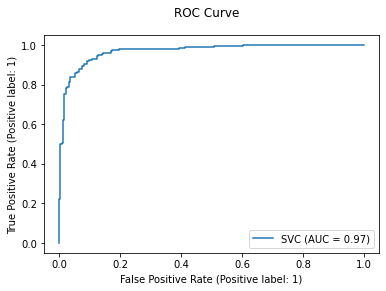

In [48]:
disp = metrics.plot_roc_curve(Final_Model, X_test, Y_test)
disp.figure_.suptitle("ROC Curve")
plt.show()

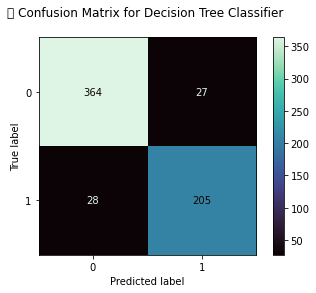

In [49]:
class_names = df.columns
metrics.plot_confusion_matrix(Classifier, X_test, Y_test, cmap='mako')
plt.title('\t Confusion Matrix for Decision Tree Classifier \n')
plt.show()

In [50]:
filename = "FinalModel_3.pkl"
joblib.dump(Final_Model, filename)

['FinalModel_3.pkl']

# Medical Cost Personal Insurance Project

In [62]:
data= pd.read_csv("https://raw.githubusercontent.com/SahilChachra/Medical-Cost-Prediction/master/insurance.csv")

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [64]:
data['region'].value_counts().sort_values()

northeast    324
southwest    325
northwest    325
southeast    364
Name: region, dtype: int64

In [65]:
data['children'].value_counts().sort_values()

5     18
4     25
3    157
2    240
1    324
0    574
Name: children, dtype: int64

In [66]:
clean_data = {'sex': {'male' : 0 , 'female' : 1} ,
                 'smoker': {'no': 0 , 'yes' : 1},
                   'region' : {'northwest':0, 'northeast':1,'southeast':2,'southwest':3}
               }
data_copy = data.copy()
data_copy.replace(clean_data, inplace=True)

In [67]:
data_copy.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.204783,1.514948,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.105572,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


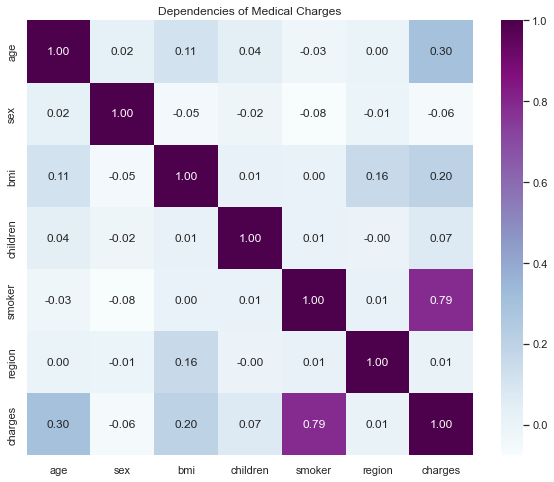

In [69]:
corr = data_copy.corr()
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr,cmap='BuPu',annot=True,fmt=".2f",ax=ax)
plt.title("Dependencies of Medical Charges")
plt.show()

In [70]:
print(data['sex'].value_counts().sort_values()) 
print(data['smoker'].value_counts().sort_values())
print(data['region'].value_counts().sort_values())

female    662
male      676
Name: sex, dtype: int64
yes     274
no     1064
Name: smoker, dtype: int64
northeast    324
southwest    325
northwest    325
southeast    364
Name: region, dtype: int64


<AxesSubplot:title={'center':'Age vs Charge'}, xlabel='age', ylabel='charges'>

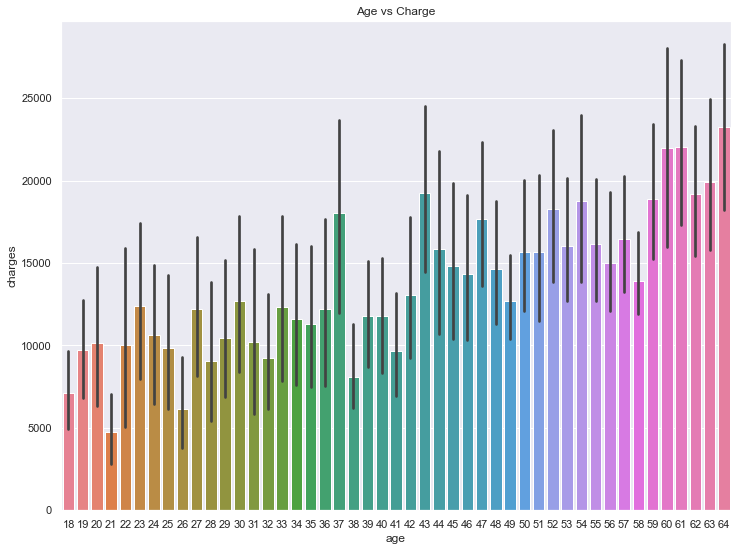

In [72]:
plt.figure(figsize=(12,9))
plt.title('Age vs Charge')
sns.barplot(x='age',y='charges',data=data_copy,palette='husl')

<AxesSubplot:title={'center':'Region vs Charge'}, xlabel='region', ylabel='charges'>

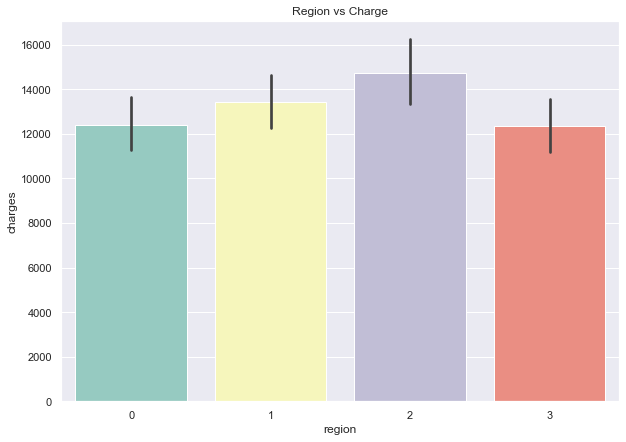

In [73]:
plt.figure(figsize=(10,7))
plt.title('Region vs Charge')
sns.barplot(x='region',y='charges',data=data_copy,palette='Set3')

Text(0.5, 1.0, 'BMI VS Charge')

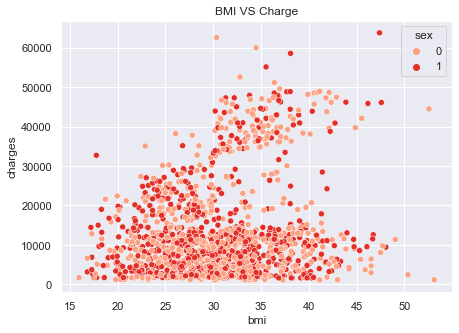

In [74]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='bmi',y='charges',hue='sex',data=data_copy,palette='Reds')
plt.title('BMI VS Charge')

<AxesSubplot:title={'center':'Smoker vs Charge'}, xlabel='smoker', ylabel='charges'>

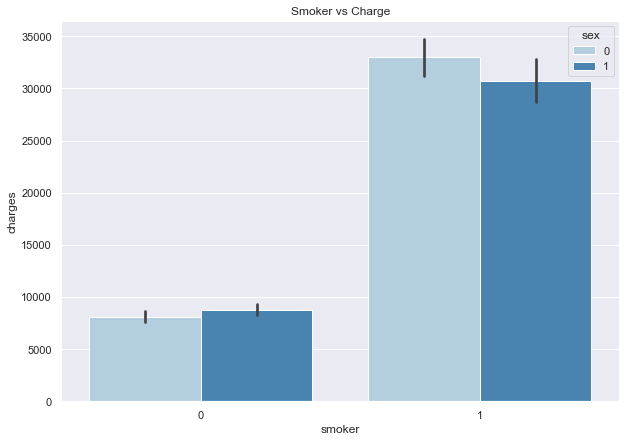

In [75]:
plt.figure(figsize=(10,7))
plt.title('Smoker vs Charge')
sns.barplot(x='smoker',y='charges',data=data_copy,palette='Blues',hue='sex')

<AxesSubplot:title={'center':'Sex vs Charges'}, xlabel='sex', ylabel='charges'>

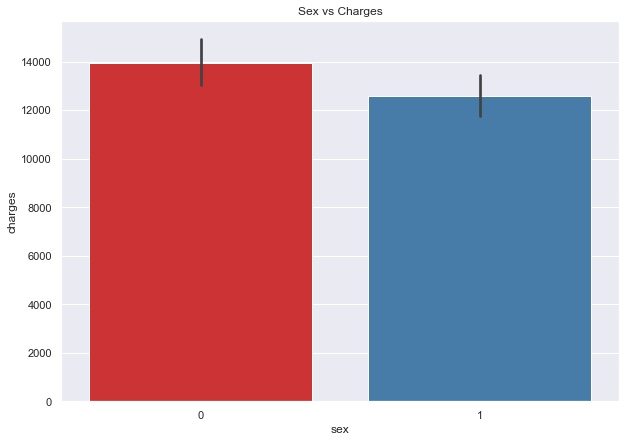

In [76]:
plt.figure(figsize=(10,7))
plt.title('Sex vs Charges')
sns.barplot(x='sex',y='charges',data=data_copy,palette='Set1')

In [77]:
print('Printing Skewness and Kurtosis for all columns')
print()
for col in list(data_copy.columns):
    print('{0} : Skewness {1:.3f} and  Kurtosis {2:.3f}'.format(col,data_copy[col].skew(),data_copy[col].kurt()))


Printing Skewness and Kurtosis for all columns

age : Skewness 0.056 and  Kurtosis -1.245
sex : Skewness 0.021 and  Kurtosis -2.003
bmi : Skewness 0.284 and  Kurtosis -0.051
children : Skewness 0.938 and  Kurtosis 0.202
smoker : Skewness 1.465 and  Kurtosis 0.146
region : Skewness -0.038 and  Kurtosis -1.329
charges : Skewness 1.516 and  Kurtosis 1.606


Text(0, 0.5, 'Count')

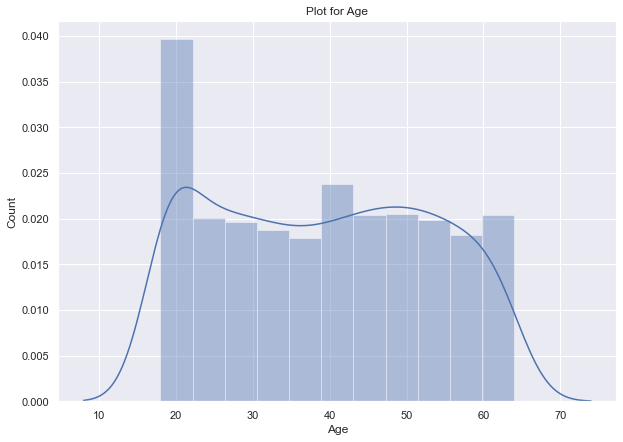

In [78]:
plt.figure(figsize=(10,7))
sns.distplot(data_copy['age'])
plt.title('Plot for Age')
plt.xlabel('Age')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

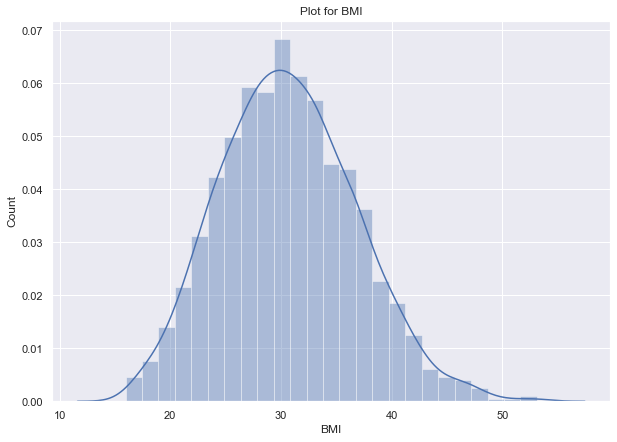

In [79]:
plt.figure(figsize=(10,7))
sns.distplot(data_copy['bmi'])
plt.title('Plot for BMI')
plt.xlabel('BMI')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

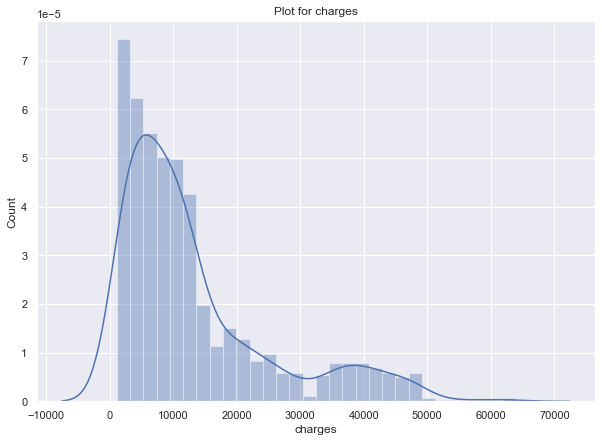

In [80]:
plt.figure(figsize=(10,7))
sns.distplot(data_copy['charges'])
plt.title('Plot for charges')
plt.xlabel('charges')
plt.ylabel('Count')

In [81]:
from sklearn.preprocessing import StandardScaler
data_pre = data_copy.copy()

tempBmi = data_pre.bmi
tempBmi = tempBmi.values.reshape(-1,1)
data_pre['bmi'] = StandardScaler().fit_transform(tempBmi)

tempAge = data_pre.age
tempAge = tempAge.values.reshape(-1,1)
data_pre['age'] = StandardScaler().fit_transform(tempAge)

tempCharges = data_pre.charges
tempCharges = tempCharges.values.reshape(-1,1)
data_pre['charges'] = StandardScaler().fit_transform(tempCharges)

data_pre.head()

,age,sex,bmi,children,smoker,region,charges
0,-1.438764,1,-0.453320,0,1,3,0.298584
1,-1.509965,0,0.509621,1,0,2,-0.953689
2,-0.797954,0,0.383307,3,0,2,-0.728675
3,-0.441948,0,-1.305531,0,0,0,0.719843
4,-0.513149,0,-0.292556,0,0,0,-0.776802


In [82]:
X = data_pre.drop('charges',axis=1).values
y = data_pre['charges'].values.reshape(-1,1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

print('Size of X_train : ', X_train.shape)
print('Size of y_train : ', y_train.shape)
print('Size of X_test : ', X_test.shape)
print('Size of Y_test : ', y_test.shape)

Size of X_train :  (1070, 6)
Size of y_train :  (1070, 1)
Size of X_test :  (268, 6)
Size of Y_test :  (268, 1)


In [83]:
%%time
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)


CPU times: user 16.9 ms, sys: 10.2 ms, total: 27.2 ms
Wall time: 15.9 ms


LinearRegression()

In [86]:
cv_linear_reg = cross_val_score(estimator = linear_reg, X = X, y = y, cv = 10)

y_pred_linear_reg_train = linear_reg.predict(X_train)
r2_score_linear_reg_train = r2_score(y_train, y_pred_linear_reg_train)

y_pred_linear_reg_test = linear_reg.predict(X_test)
r2_score_linear_reg_test = r2_score(y_test, y_pred_linear_reg_test)

rmse_linear = (np.sqrt(mean_squared_error(y_test, y_pred_linear_reg_test)))

print('CV Linear Regression : {0:.3f}'.format(cv_linear_reg.mean()))
print('R2_score (train) : {0:.3f}'.format(r2_score_linear_reg_train))
print('R2_score (test) : {0:.3f}'.format(r2_score_linear_reg_test))
print('RMSE : {0:.3f}'.format(rmse_linear))

CV Linear Regression : 0.745
R2_score (train) : 0.741
R2_score (test) : 0.783
RMSE : 0.480


In [87]:
X_c = data_copy.drop('charges',axis=1).values
y_c = data_copy['charges'].values.reshape(-1,1)

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c,y_c,test_size=0.2, random_state=42)

X_train_scaled = StandardScaler().fit_transform(X_train_c)
y_train_scaled = StandardScaler().fit_transform(y_train_c)
X_test_scaled = StandardScaler().fit_transform(X_test_c)
y_test_scaled = StandardScaler().fit_transform(y_test_c)

svr = SVR()

In [88]:
parameters =  { 'kernel' : ['rbf', 'sigmoid'],
                 'gamma' : [0.001, 0.01, 0.1, 1, 'scale'],
                 'tol' : [0.0001],
                 'C': [0.001, 0.01, 0.1, 1, 10, 100] }
svr_grid = GridSearchCV(estimator=svr, param_grid=parameters, cv=10, verbose=4, n_jobs=-1)
svr_grid.fit(X_train_scaled, y_train_scaled.ravel())

Fitting 10 folds for each of 60 candidates, totalling 600 fits


GridSearchCV(cv=10, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 'scale'],
                         'kernel': ['rbf', 'sigmoid'], 'tol': [0.0001]},
             verbose=4)

In [89]:
svr = SVR(C=10, gamma=0.1, tol=0.0001)
svr.fit(X_train_scaled, y_train_scaled.ravel())
print(svr_grid.best_estimator_)
print(svr_grid.best_score_)

SVR(C=10, gamma=0.1, tol=0.0001)
0.8311276912561503


In [90]:
cv_svr = svr_grid.best_score_

y_pred_svr_train = svr.predict(X_train_scaled)
r2_score_svr_train = r2_score(y_train_scaled, y_pred_svr_train)

y_pred_svr_test = svr.predict(X_test_scaled)
r2_score_svr_test = r2_score(y_test_scaled, y_pred_svr_test)

rmse_svr = (np.sqrt(mean_squared_error(y_test_scaled, y_pred_svr_test)))

print('CV : {0:.3f}'.format(cv_svr.mean()))
print('R2_score (train) : {0:.3f}'.format(r2_score_svr_train))
print('R2 score (test) : {0:.3f}'.format(r2_score_svr_test))
print('RMSE : {0:.3f}'.format(rmse_svr))

CV : 0.831
R2_score (train) : 0.857
R2 score (test) : 0.871
RMSE : 0.359


In [91]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge

steps = [ ('scalar', StandardScaler()),
        ('poly', PolynomialFeatures(degree=2)),
        ('model', Ridge())]

ridge_pipe = Pipeline(steps)

In [92]:
parameters = { 'model__alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2,1,2,5,10,20,25,35, 43,55,100], 'model__random_state' : [42]}
reg_ridge = GridSearchCV(ridge_pipe, parameters, cv=10)
reg_ridge = reg_ridge.fit(X_train, y_train.ravel())

In [93]:
reg_ridge.best_estimator_, reg_ridge.best_score_

(Pipeline(steps=[('scalar', StandardScaler()), ('poly', PolynomialFeatures()),
                 ('model', Ridge(alpha=20, random_state=42))]),
 0.8259990140429396)

In [95]:
ridge = Ridge(alpha=20, random_state=42)
ridge.fit(X_train_scaled, y_train_scaled.ravel())
cv_ridge = reg_ridge.best_score_

y_pred_ridge_train = ridge.predict(X_train_scaled)
r2_score_ridge_train = r2_score(y_train_scaled, y_pred_ridge_train)

y_pred_ridge_test = ridge.predict(X_test_scaled)
r2_score_ridge_test = r2_score(y_test_scaled, y_pred_ridge_test)

rmse_ridge = (np.sqrt(mean_squared_error(y_test_scaled, y_pred_linear_reg_test)))
print('CV : {0:.3f}'.format(cv_ridge.mean()))
print('R2 score (train) : {0:.3f}'.format(r2_score_ridge_train))
print('R2 score (test) : {0:.3f}'.format(r2_score_ridge_test))
print('RMSE : {0:.3f}'.format(rmse_ridge))

CV : 0.826
R2 score (train) : 0.741
R2 score (test) : 0.784
RMSE : 0.465


In [96]:
%%time
reg_rf = RandomForestRegressor()
parameters = { 'n_estimators':[600,1000,1200],
             'max_features': ["auto"],
             'max_depth':[40,50,60],
             'min_samples_split': [5,7,9],
             'min_samples_leaf': [7,10,12],
             'criterion': ['mse']}

reg_rf_gscv = GridSearchCV(estimator=reg_rf, param_grid=parameters, cv=10, n_jobs=-1)
reg_rf_gscv = reg_rf_gscv.fit(X_train_scaled, y_train_scaled.ravel())

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: C

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: C

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: C

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: C

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: C

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: C

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: C

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: C

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: C

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: C

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: C

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: C

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: C

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: C

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: C

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: C

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: C

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: C

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: C

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: C

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: C

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: C

CPU times: user 3.33 s, sys: 448 ms, total: 3.78 s
Wall time: 3min 35s


In [97]:
reg_rf_gscv.best_score_, reg_rf_gscv.best_estimator_

(0.8485451496385554,
 RandomForestRegressor(criterion='mse', max_depth=50, min_samples_leaf=12,
                       min_samples_split=5, n_estimators=600))

In [98]:
rf_reg = RandomForestRegressor(max_depth=50, min_samples_leaf=12, min_samples_split=7,
                       n_estimators=1200)
rf_reg.fit(X_train_scaled, y_train_scaled.ravel())

RandomForestRegressor(max_depth=50, min_samples_leaf=12, min_samples_split=7,
                      n_estimators=1200)

In [100]:
cv_rf = reg_rf_gscv.best_score_

y_pred_rf_train = rf_reg.predict(X_train_scaled)
r2_score_rf_train = r2_score(y_train, y_pred_rf_train)

y_pred_rf_test = rf_reg.predict(X_test_scaled)
r2_score_rf_test = r2_score(y_test_scaled, y_pred_rf_test)

rmse_rf = np.sqrt(mean_squared_error(y_test_scaled, y_pred_rf_test))

print('CV : {0:.3f}'.format(cv_rf.mean()))
print('R2 score (train) : {0:.3f}'.format(r2_score_rf_train))
print('R2 score (test) : {0:.3f}'.format(r2_score_rf_test))
print('RMSE : {0:.3f}'.format(rmse_rf))

CV : 0.849
R2 score (train) : 0.885
R2 score (test) : 0.879
RMSE : 0.348


In [101]:
models = [('Linear Regression', rmse_linear, r2_score_linear_reg_train, r2_score_linear_reg_test, cv_linear_reg.mean()),
          ('Ridge Regression', rmse_ridge, r2_score_ridge_train, r2_score_ridge_test, cv_ridge.mean()),
          ('Support Vector Regression', rmse_svr, r2_score_svr_train, r2_score_svr_test, cv_svr.mean()),
          ('Random Forest Regression', rmse_rf, r2_score_rf_train, r2_score_rf_test, cv_rf.mean())   
         ]

In [102]:
predict = pd.DataFrame(data = models, columns=['Model', 'RMSE', 'R2_Score(training)', 'R2_Score(test)', 'Cross-Validation'])
predict

,Model,RMSE,R2_Score(training),R2_Score(test),Cross-Validation
0,Linear Regression,0.479808,0.741410,0.782694,0.744528
1,Ridge Regression,0.465206,0.741150,0.783800,0.825999
2,Support Vector Regression,0.358769,0.857235,0.871285,0.831128
3,Random Forest Regression,0.347933,0.884580,0.878943,0.848545


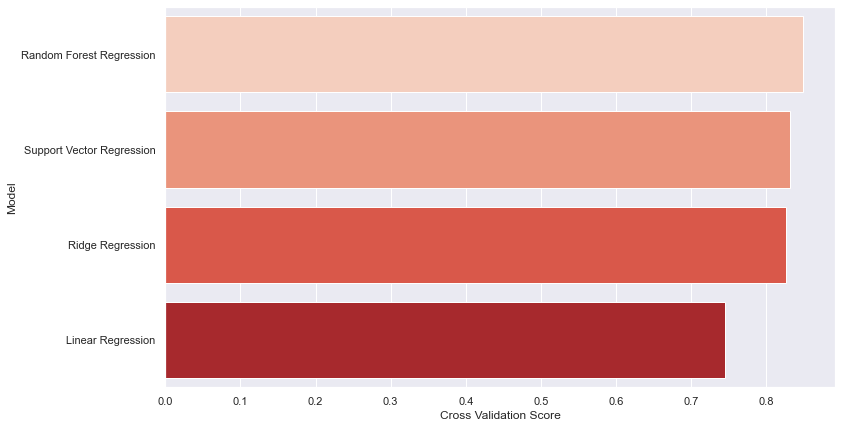

In [103]:
plt.figure(figsize=(12,7))
predict.sort_values(by=['Cross-Validation'], ascending=False, inplace=True)

sns.barplot(x='Cross-Validation', y='Model',data = predict, palette='Reds')
plt.xlabel('Cross Validation Score')
plt.ylabel('Model')
plt.show()

In [104]:
data_copy.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,0,21984.47061
4,32,0,28.880,0,0,0,3866.85520


In [105]:
X_ = data_copy.drop('charges',axis=1).values
y_ = data_copy['charges'].values.reshape(-1,1)

from sklearn.model_selection import train_test_split
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_,y_,test_size=0.2, random_state=42)

print('Size of X_train_ : ', X_train_.shape)
print('Size of y_train_ : ', y_train_.shape)
print('Size of X_test_ : ', X_test_.shape)
print('Size of Y_test_ : ', y_test_.shape)

Size of X_train_ :  (1070, 6)
Size of y_train_ :  (1070, 1)
Size of X_test_ :  (268, 6)
Size of Y_test_ :  (268, 1)


In [106]:
rf_reg = RandomForestRegressor(max_depth=50, min_samples_leaf=12, min_samples_split=7,
                       n_estimators=1200)
rf_reg.fit(X_train_, y_train_.ravel())

RandomForestRegressor(max_depth=50, min_samples_leaf=12, min_samples_split=7,
                      n_estimators=1200)

In [107]:
y_pred_rf_train_ = rf_reg.predict(X_train_)
r2_score_rf_train_ = r2_score(y_train_, y_pred_rf_train_)

y_pred_rf_test_ = rf_reg.predict(X_test_)
r2_score_rf_test_ = r2_score(y_test_, y_pred_rf_test_)

print('R2 score (train) : {0:.3f}'.format(r2_score_rf_train_))
print('R2 score (test) : {0:.3f}'.format(r2_score_rf_test_))

R2 score (train) : 0.884
R2 score (test) : 0.878


In [108]:
import pickle

Pkl_Filename = "rf_tuned.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(rf_reg, file)

In [109]:
with open(Pkl_Filename, 'rb') as file:  
    rf_tuned_loaded = pickle.load(file)

In [110]:
rf_tuned_loaded

RandomForestRegressor(max_depth=50, min_samples_leaf=12, min_samples_split=7,
                      n_estimators=1200)

In [111]:
pred=rf_tuned_loaded.predict(np.array([20,1,28,0,1,3]).reshape(1,6))[0]

In [112]:
print('{0:.3f}'.format(pred))

19034.905
[CV 2/10] END C=0.001, gamma=0.001, kernel=rbf, tol=0.0001;, score=-0.089 total time=   0.1s
[CV 2/10] END C=0.001, gamma=0.001, kernel=sigmoid, tol=0.0001;, score=-0.090 total time=   0.1s
[CV 2/10] END C=0.001, gamma=0.01, kernel=rbf, tol=0.0001;, score=-0.072 total time=   0.1s
[CV 10/10] END C=0.001, gamma=0.01, kernel=rbf, tol=0.0001;, score=-0.027 total time=   0.1s
[CV 8/10] END C=0.001, gamma=0.01, kernel=sigmoid, tol=0.0001;, score=-0.076 total time=   0.1s
[CV 7/10] END C=0.001, gamma=0.1, kernel=rbf, tol=0.0001;, score=-0.058 total time=   0.1s
[CV 3/10] END C=0.001, gamma=0.1, kernel=sigmoid, tol=0.0001;, score=0.013 total time=   0.1s
[CV 7/10] END C=0.001, gamma=1, kernel=rbf, tol=0.0001;, score=-0.112 total time=   0.1s
[CV 8/10] END C=0.001, gamma=1, kernel=rbf, tol=0.0001;, score=-0.078 total time=   0.1s
[CV 5/10] END C=0.001, gamma=1, kernel=sigmoid, tol=0.0001;, score=0.178 total time=   0.1s
[CV 6/10] END C=0.001, gamma=1, kernel=sigmoid, tol=0.0001;, sco

[CV 5/10] END C=0.001, gamma=0.001, kernel=rbf, tol=0.0001;, score=-0.060 total time=   0.1s
[CV 9/10] END C=0.001, gamma=0.001, kernel=rbf, tol=0.0001;, score=-0.068 total time=   0.1s
[CV 7/10] END C=0.001, gamma=0.001, kernel=sigmoid, tol=0.0001;, score=-0.117 total time=   0.1s
[CV 8/10] END C=0.001, gamma=0.01, kernel=rbf, tol=0.0001;, score=-0.068 total time=   0.1s
[CV 7/10] END C=0.001, gamma=0.01, kernel=sigmoid, tol=0.0001;, score=-0.109 total time=   0.1s
[CV 5/10] END C=0.001, gamma=0.1, kernel=rbf, tol=0.0001;, score=0.001 total time=   0.1s
[CV 4/10] END C=0.001, gamma=0.1, kernel=sigmoid, tol=0.0001;, score=-0.141 total time=   0.1s
[CV 5/10] END C=0.001, gamma=1, kernel=rbf, tol=0.0001;, score=-0.054 total time=   0.1s
[CV 6/10] END C=0.001, gamma=1, kernel=rbf, tol=0.0001;, score=-0.080 total time=   0.1s
[CV 1/10] END C=0.001, gamma=scale, kernel=rbf, tol=0.0001;, score=-0.069 total time=   0.1s
[CV 2/10] END C=0.001, gamma=scale, kernel=rbf, tol=0.0001;, score=-0.040

[CV 4/10] END C=0.001, gamma=0.001, kernel=rbf, tol=0.0001;, score=-0.230 total time=   0.1s
[CV 10/10] END C=0.001, gamma=0.001, kernel=rbf, tol=0.0001;, score=-0.043 total time=   0.1s
[CV 6/10] END C=0.001, gamma=0.001, kernel=sigmoid, tol=0.0001;, score=-0.085 total time=   0.1s
[CV 5/10] END C=0.001, gamma=0.01, kernel=rbf, tol=0.0001;, score=-0.043 total time=   0.1s
[CV 3/10] END C=0.001, gamma=0.01, kernel=sigmoid, tol=0.0001;, score=-0.076 total time=   0.1s
[CV 3/10] END C=0.001, gamma=0.1, kernel=rbf, tol=0.0001;, score=-0.019 total time=   0.1s
[CV 1/10] END C=0.001, gamma=0.1, kernel=sigmoid, tol=0.0001;, score=-0.041 total time=   0.1s
[CV 3/10] END C=0.001, gamma=1, kernel=rbf, tol=0.0001;, score=-0.080 total time=   0.1s
[CV 4/10] END C=0.001, gamma=1, kernel=rbf, tol=0.0001;, score=-0.225 total time=   0.1s
[CV 3/10] END C=0.001, gamma=scale, kernel=rbf, tol=0.0001;, score=-0.028 total time=   0.1s
[CV 4/10] END C=0.001, gamma=scale, kernel=rbf, tol=0.0001;, score=-0.1

[CV 6/10] END C=0.001, gamma=0.001, kernel=rbf, tol=0.0001;, score=-0.084 total time=   0.1s
[CV 3/10] END C=0.001, gamma=0.001, kernel=sigmoid, tol=0.0001;, score=-0.087 total time=   0.1s
[CV 1/10] END C=0.001, gamma=0.01, kernel=rbf, tol=0.0001;, score=-0.109 total time=   0.1s
[CV 9/10] END C=0.001, gamma=0.01, kernel=rbf, tol=0.0001;, score=-0.052 total time=   0.1s
[CV 6/10] END C=0.001, gamma=0.01, kernel=sigmoid, tol=0.0001;, score=-0.076 total time=   0.1s
[CV 4/10] END C=0.001, gamma=0.1, kernel=rbf, tol=0.0001;, score=-0.168 total time=   0.1s
[CV 2/10] END C=0.001, gamma=0.1, kernel=sigmoid, tol=0.0001;, score=-0.007 total time=   0.1s
[CV 1/10] END C=0.001, gamma=1, kernel=rbf, tol=0.0001;, score=-0.118 total time=   0.1s
[CV 2/10] END C=0.001, gamma=1, kernel=rbf, tol=0.0001;, score=-0.083 total time=   0.1s
[CV 9/10] END C=0.001, gamma=1, kernel=sigmoid, tol=0.0001;, score=0.169 total time=   0.1s
[CV 10/10] END C=0.001, gamma=1, kernel=sigmoid, tol=0.0001;, score=0.191 